In [9]:
import pandas as pd
import sys
from datetime import datetime
from datetime import timedelta,date
import numpy as np
import os

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from patsy import dmatrices
from scipy.stats import pearsonr
import seaborn as sns
from patsy import dmatrix, demo_data, ContrastMatrix, Poly
import calendar
import matplotlib.pyplot as plt

In [77]:
import pandoc

# BAD WEATHER VS AUC LEVEL (GYM):

In [16]:
#read data bad weather,intervention_coef2

coefData = pd.read_csv('/Users/xiaominli/Documents/habitPCS/newFolder/coefficient_gym_badweather.csv',engine='python')
aucs = pd.read_csv('/Users/xiaominli/Documents/habitPCS/newFolder/auc_gym_goodbadweather.csv',engine='python')
df = pd.concat([coefData, aucs], axis=1)
df = df[df['intervention_coef2']>df['intervention_coef2'].mean()-3*df['intervention_coef2'].std()]
df = df[df['intervention_coef2']<df['intervention_coef2'].mean()+3*df['intervention_coef2'].std()]
df = df[['aucs','intervention_coef2']]

In [15]:
df.to_csv('lastshift.csv')

In [4]:
for iterr,row in df.iterrows():
    if row['intervention_coef2']<0:
        df.at[iterr,'newDummy'] = 1
        continue
    df.at[iterr,'newDummy'] = 0

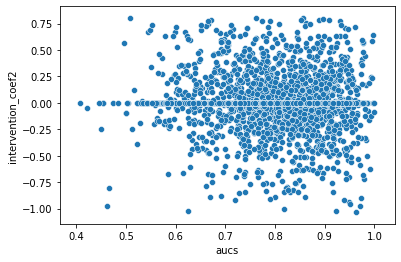

In [60]:
sns.scatterplot(data=df, x="aucs", y="intervention_coef2")
#x label is compliances before intervention

In [18]:
y_coef, X_auc = dmatrices('intervention_coef2~ aucs', df, return_type = 'dataframe')
X_auc = sm.add_constant(X_auc)
model = sm.OLS(y_coef,X_auc)
results = model.fit()
print(results.summary2())
### RESULT FOR WHETHER BAD WEATHER SENSITIVITY IS AFFECTED BY AUC LEVEL(GYM DATA)

                  Results: Ordinary least squares
Model:              OLS                Adj. R-squared:     0.001    
Dependent Variable: intervention_coef2 AIC:                -232.3730
Date:               2021-07-15 15:31   BIC:                -220.2525
No. Observations:   3166               Log-Likelihood:     118.19   
Df Model:           1                  F-statistic:        3.361    
Df Residuals:       3164               Prob (F-statistic): 0.0668   
R-squared:          0.001              Scale:              0.054372 
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
Intercept      0.0662     0.0336    1.9712   0.0488    0.0004   0.1321
aucs          -0.0771     0.0420   -1.8333   0.0668   -0.1595   0.0054
--------------------------------------------------------------------
Omnibus:              304.918       Durbin-

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2608: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# GOOD WEATHER VS AUC LEVEL (GYM):

In [19]:
#read data good weather

coefDataGoodWeather = pd.read_csv('/Users/xiaominli/Documents/habitPCS/newFolder/coefficient_gym_goodweather.csv',engine='python')
aucsGym = pd.read_csv('/Users/xiaominli/Documents/habitPCS/newFolder/auc_gym_goodbadweather.csv',engine='python')
df = pd.concat([coefDataGoodWeather, aucsGym], axis=1)
df = df[df['intervention_coef1']>df['intervention_coef1'].mean()-3*df['intervention_coef1'].std()]
df = df[df['intervention_coef1']<df['intervention_coef1'].mean()+3*df['intervention_coef1'].std()]
df = df[['aucs','intervention_coef1']]

In [7]:
for iterr,row in df.iterrows():
    if row['intervention_coef1']<0:
        df.at[iterr,'newDummy'] = 1
        continue
    df.at[iterr,'newDummy'] = 0

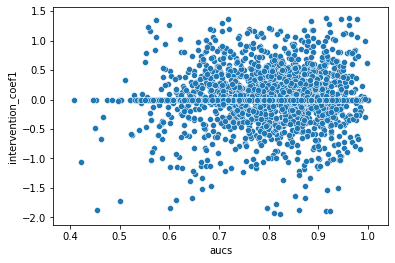

In [64]:
sns.scatterplot(data=df, x="aucs", y="intervention_coef1")
#x label is compliances before intervention

In [20]:
y_coef, X_auc = dmatrices('abs(intervention_coef1)~ aucs', df, return_type = 'dataframe')
X_auc = sm.add_constant(X_auc)
model = sm.OLS(y_coef,X_auc)
results = model.fit()
print(results.summary2())
### RESULT FOR WHETHER GOOD WEATHER SENSITIVITY IS AFFECTED BY AUC LEVEL(GYM DATA)

                     Results: Ordinary least squares
Model:              OLS                     Adj. R-squared:     0.001    
Dependent Variable: abs(intervention_coef1) AIC:                1599.8598
Date:               2021-07-15 15:37        BIC:                1611.9758
No. Observations:   3159                    Log-Likelihood:     -797.93  
Df Model:           1                       F-statistic:        5.727    
Df Residuals:       3157                    Prob (F-statistic): 0.0168   
R-squared:          0.002                   Scale:              0.097095 
-----------------------------------------------------------------------------
              Coef.      Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------
Intercept     0.0888       0.0450     1.9727     0.0486     0.0005     0.1771
aucs          0.1348       0.0563     2.3931     0.0168     0.0244     0.2453
---------------------------------------

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2608: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# LAST SHIFT VS AUC LEVEL (HANDWASH):

In [14]:
#read data lastshift

coefDatalast = pd.read_csv('/Users/xiaominli/Documents/habitPCS/lastshiftCoefficient.csv',engine='python')
aucslast = pd.read_csv('/Users/xiaominli/Documents/habitPCS/aucLastCoef.csv',engine='python')
df = pd.concat([coefDatalast, aucslast], axis=1)
df = df[df['intervention_coef']>df['intervention_coef'].mean()-3*df['intervention_coef'].std()]
df = df[df['intervention_coef']<df['intervention_coef'].mean()+3*df['intervention_coef'].std()]

In [70]:
df = df[['auc_preint','intervention_coef']]
for iterr,row in df.iterrows():
    if row['intervention_coef']<0:
        df.at[iterr,'newDummy'] = 1
        continue
    df.at[iterr,'newDummy'] = 0

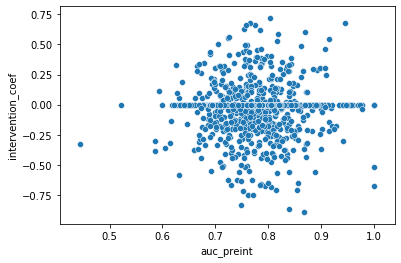

In [71]:
sns.scatterplot(data=df, x="auc_preint", y="intervention_coef")
#x label is compliances before intervention

In [73]:
#THE EFFECT OF LAST SHIFT
y_coef, X_auc = dmatrices('intervention_coef~ auc_preint', df, return_type = 'dataframe')
X_auc = sm.add_constant(X_auc)
model = sm.OLS(y_coef,X_auc)
results = model.fit()
print(results.summary2())
### RESULT FOR WHETHER IS LAST SHIFT IS AFFECTED BY AUC LEVEL FOR HAND WASHING

                  Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     -0.001   
Dependent Variable: intervention_coef AIC:                -313.1731
Date:               2021-07-11 17:05  BIC:                -303.3476
No. Observations:   1005              Log-Likelihood:     158.59   
Df Model:           1                 F-statistic:        0.01252  
Df Residuals:       1003              Prob (F-statistic): 0.911    
R-squared:          0.000             Scale:              0.042789 
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
Intercept    -0.0380     0.0735   -0.5168   0.6054   -0.1823   0.1063
auc_preint    0.0105     0.0939    0.1119   0.9109   -0.1738   0.1948
-------------------------------------------------------------------
Omnibus:               93.288       Durbin-Watson:      

/Users/xiaominli/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2608: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
